In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [229]:
#Define the distributions
#beta = np.diag(np.array([1,2,3]))
beta = (np.array([[1,0.9,0.9], [0.9, 2, 0.9], [0.9,0.9,3]]))
idx = np.array([0,2,3])

#To choose selected rows and columns
#print Betha[idx[None,:],idx]
#or
#print Betha[np.ix_([1,2,3],idx)]

In [230]:
print beta

[[1.  0.9 0.9]
 [0.9 2.  0.9]
 [0.9 0.9 3. ]]


In [231]:
def unnormalised_gaussian(tetha, params):
    beta = params
    return np.exp(-0.5*np.dot(tetha.T, np.dot(beta, tetha)))

In [232]:
def gibbs_sampling(tetha0, beta, update = 'random', num_iter = 100):
    samples = []
    dim = beta.shape[0]
    full_indexes = np.arange(dim)
    cur_tetha = tetha0.copy()
    for i in range(num_iter):
        #select the coordinate to update
        next_index = np.random.randint(dim)
        other_indexes = list(full_indexes)
        other_indexes.remove(next_index)
        other_indexes = np.array(other_indexes)
        tetha_1 = cur_tetha[next_index] 
        tetha_2 = cur_tetha[other_indexes]
        beta11 = beta[next_index, next_index]
        beta12 = beta[other_indexes[:,None],next_index ].T
        mu_post = -np.dot(1/(beta11), np.dot(beta12, tetha_2))
        tetha_1_next = np.random.normal(mu_post, 1/np.sqrt(beta11))
        cur_tetha[next_index] = tetha_1_next
        samples.append(cur_tetha.copy())
        
    samples = np.vstack(samples)
    return samples

In [233]:
tetha0 = np.array([0.0,0.0,0.0])
num_iter = 5

### Perform Gibbs Sampling

In [234]:
samples = gibbs_sampling(tetha0, beta, 'random', 4000)

### Check the statistics

In [235]:
print 'The mean is:' + str(np.mean(samples))
for i in range(samples.shape[1]):
    print 'The variance of ' + str(i) + ' is ' + str(np.var(samples[:,i]))

The mean is:0.006235088413566111
The variance of 0 is 1.9020191492806209
The variance of 1 is 0.823595400691325
The variance of 2 is 0.4415735898928347


### Check the autocorrelation 

In [236]:
def calc_autocorrelation(samples,d=1):
    mu = np.mean(samples)
    nom = 0
    n = len(samples)
    denom = np.var(samples)*n
    for i in range(n-d):
        nom += (samples[i]-mu)*(samples[i+d]-mu)
    return nom/denom

In [237]:
def statistics_1(samples):
    #calculate the sum for each of the sample
    new_samples = [np.sum(sample) for sample in samples]
    return new_samples

def statistics_2(samples):
    new_samples = [np.dot(sample, sample) for sample in samples]
    return new_samples

def statistics_4(samples):
    new_samples = [sample[0]**2 for sample in samples]
    return new_samples


In [238]:
sample_statistic1 = statistics_1(samples)
sample_statistic2 = statistics_2(samples)
sample_statistic4 = statistics_4(samples)


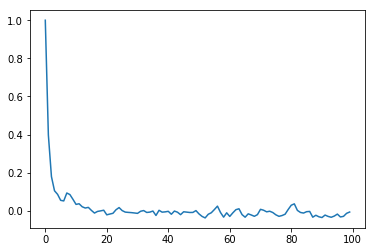

In [243]:
autocorrs = []
for d in range(100):
    autocorrs.append(calc_autocorrelation(sample_statistic1,d))
plt.plot(autocorrs)

In [195]:
import scipy.stats